### Importación de librerías

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [3]:
# Matplotlib params

from matplotlib import rcParams
rcParams['figure.figsize'] = 14, 10
sns.set_context('paper', font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.despine()
sns.set_style("dark")

<Figure size 1008x720 with 0 Axes>

In [4]:
# Aprendizaje supervisado - preprocesamiento y análisis de calidad de modelos

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import datasets
from math import sqrt


In [5]:
# Librerías de sklearn

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
# Librerías regresión lineal & co.

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

# Integración de Base de datos en MySQL Workbench

> Toda la información contenida en el dataset presentado a continuación fue descargada de manera directa desde la web. Por una cuestión de tiempo y porque a priori no he encontrado otras fuentes desde las cuales extraer el dato, no se han implementado técnicas de Scraping. 

> Toda la información está contenida en una única tabla. Al no ser muchas las variables, se consideró acorde mantener todas juntas en una misma tabla que ha sido cargada en la base de datos del servidor local denominada "Prueba Técnica". La tabla en cuestión fue denominada "1994-2021 - clima - agrupacion por dia"

In [7]:
img2 = mpimg.imread('mysql.jpg')

In [8]:
plt.figure(figsize = (200,200))
plt.imshow(img2, interpolation='nearest')

### Carga de serie de datos: 1994 to 2021

In [9]:
df = pd.read_csv('1994-2021 - agrupacion por dia.csv', sep=';')

In [10]:
df

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,HORATMAX,DIR,VELMEDIA,RACHA,HORARACHA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN
0,1994-04-20,0201D,BARCELONA,BARCELONA,6,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,35.3,70:40,NaN,NaN,NaN,NaN,NaN
1,1994-04-21,0201D,BARCELONA,BARCELONA,6,12.4,0.0,10.0,05:20,14.8,Varias,17.0,3.9,7.5,17:40,NaN,1010.4,Varias,1002.7,02
2,1994-04-22,0201D,BARCELONA,BARCELONA,6,13.6,0.0,10.5,05:10,16.6,13:30,18.0,3.6,10.0,16:30,NaN,1010.2,Varias,1005.8,24
3,1994-04-23,0201D,BARCELONA,BARCELONA,6,15.5,1.4,12.6,05:45,18.4,17:55,21.0,4.4,12.5,16:50,NaN,1007.5,09,1005.1,04
4,1994-04-24,0201D,BARCELONA,BARCELONA,6,13.4,6.8,10.8,23:40,16.1,Varias,28.0,3.1,17.5,16:00,NaN,1008.6,24,1003.4,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,2021-06-30,0201D,BARCELONA,BARCELONA,6,23.4,0.0,21.6,04:10,25.2,11:00,4.0,4.7,9.7,17:50,NaN,NaN,NaN,NaN,NaN
9270,2021-07-01,0201D,BARCELONA,BARCELONA,6,23.8,0.0,22.1,05:20,25.5,17:50,99.0,4.7,10.8,14:40,NaN,NaN,NaN,NaN,NaN
9271,2021-07-02,0201D,BARCELONA,BARCELONA,6,24.4,0.0,21.9,03:10,26.8,14:30,10.0,4.4,10.8,15:40,NaN,NaN,NaN,NaN,NaN
9272,2021-07-03,0201D,BARCELONA,BARCELONA,6,24.4,0.0,22.4,03:30,26.4,08:00,2.0,3.9,10.8,11:30,NaN,NaN,NaN,NaN,NaN


### Descripcipión de variables del Dataset

>**Columna1**: Fecha en formato (aaaa-mm-dd) . Si lo abre con una hoja de cálculo, es posible que interprete el campo como fecha y lo vea en el formato habitual dd/mm/aaaa

>**Columna2**: Identificador de Estación Meteorológica (Valor de 4 ó 5 caracteres)

>**Columna3**: Nombre de la Estación

>**Columna4**: Provincia en la que se encuentra

>**Columna5**: Altitud (metros) sobre el nivel del mar

>**Columna6**: Temperatura media diaria (ºC)

>**Columna7**: Precipitación diaria de 07h a 07h (mm = l/m2) 

>**Columna8**: Temperatura minima del día(ºC)

>**Columna9**: Hora de Temperatura mínima (hh:mm UTC)

>**Columna10**: Temperatura Máxima (ºC)

>**Columna11**: Hora de Temperatura máxima (hh:mm UTC)

>**Columna12**: Dirección de la racha máxima (decenas de grado)

>**Columna13**: Velocidad media del viento (m/s)

>**Columna14**: Racha máxima de viento (m/s)

>**Columna15**: Hora y minuto Racha máxima de viento (hh:mm UTC) 

>**Columna16**: Horas de Sol (horas)

>**Columna17**: Presión máxima al nivel de referencia de la estación (hPa)

>**Columna18**: Hora de la presión máxima (redondeada a la hora entera más próxima) (hora)

>**Columna19**: Presión mínima al nivel de referencia de la estación (hPa)

>**Columna20**: Hora de la presión mínima (redondeada a la hora entera más próxima) (hora)


---

# Exploración y preprocesamiento inicial del dataset

### Información detallada de dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9274 entries, 0 to 9273
Data columns (total 20 columns):
FECHA            9274 non-null object
INDICATIVO       9274 non-null object
NOMBRE           9274 non-null object
PROVINCIA        9274 non-null object
ALTITUD          9274 non-null int64
TMEDIA           8845 non-null float64
PRECIPITACION    8921 non-null object
TMIN             8846 non-null float64
HORATMIN         8834 non-null object
TMAX             8849 non-null float64
HORATMAX         8833 non-null object
DIR              8950 non-null float64
VELMEDIA         9173 non-null float64
RACHA            8950 non-null float64
HORARACHA        8950 non-null object
SOL              0 non-null float64
PRESMAX          812 non-null float64
HORAPRESMAX      812 non-null object
PRESMIN          812 non-null float64
HORAPRESMIN      812 non-null object
dtypes: float64(9), int64(1), object(10)
memory usage: 1.4+ MB


### Columnas

In [12]:
df.columns

Index(['FECHA', 'INDICATIVO', 'NOMBRE', 'PROVINCIA', 'ALTITUD', 'TMEDIA',
       'PRECIPITACION', 'TMIN', 'HORATMIN', 'TMAX', 'HORATMAX', 'DIR',
       'VELMEDIA', 'RACHA', 'HORARACHA', 'SOL', 'PRESMAX', 'HORAPRESMAX',
       'PRESMIN', 'HORAPRESMIN'],
      dtype='object')

# Exploración de NA's

In [13]:
round(df.isna().sum()/len(df), 3)

FECHA            0.000
INDICATIVO       0.000
NOMBRE           0.000
PROVINCIA        0.000
ALTITUD          0.000
TMEDIA           0.046
PRECIPITACION    0.038
TMIN             0.046
HORATMIN         0.047
TMAX             0.046
HORATMAX         0.048
DIR              0.035
VELMEDIA         0.011
RACHA            0.035
HORARACHA        0.035
SOL              1.000
PRESMAX          0.912
HORAPRESMAX      0.912
PRESMIN          0.912
HORAPRESMIN      0.912
dtype: float64

*En cuanto a la presencia de NA's pueden reconocerse dos grupos de variables:*
   
       -Variables que poseen entre el 1 y el 5% de NA's
   
       -Variables que poseen entre el 90 y el 100% de NA's
    
*En base a las diferentes situaciones, se plantean dos escenarios diversos.* 
    
    -Para el primer grupo de variables se procederá a rellenar sus datos faltantes mediante la imputación de la media de cada variable habiendose agrupado previamente por mes
    
    -Para el segundo grupo se plantea el reemplazo de NA's por "0" y su eventual descarte como variables relevantes para el modelo, a menos que se encuentre una relación causal entre volumen de precipitaciones y nivel de presión. En principio se probará como una de las variables del modelo

##### Como la variable "MES" no ha sido creada, se procederá a la imputación de NA's más adelante

---

# Exploración de valores disponibles en variables

### Precipitaciones

##### Cantidad de valores diferentes

In [14]:
df.PRECIPITACION.nunique()

293

In [15]:
df.PRECIPITACION.value_counts().sort_values(ascending=False)

0.0     7049
0.1      211
0.2      103
0.3       83
0.4       80
        ... 
24.5       1
27.5       1
12.8       1
27.8       1
21.9       1
Name: PRECIPITACION, Length: 293, dtype: int64

##### Observamos los valores posibles para la variable

In [16]:
unique_values = df.PRECIPITACION.unique().tolist()

In [17]:
unique_values

[nan,
 '0.0',
 '1.4',
 '6.8',
 '0.1',
 '10.0',
 '0.3',
 '3.6',
 '2.5',
 '2.8',
 '2.3',
 '12.8',
 '34.9',
 '0.5',
 '1.1',
 '0.7',
 '6.3',
 '0.6',
 '47.1',
 '27.5',
 '2.1',
 '1.6',
 '6.4',
 '0.4',
 '26.8',
 '6.5',
 '17.3',
 '13.2',
 '2.0',
 '59.2',
 '21.9',
 '1.9',
 '2.6',
 '2.4',
 '0.2',
 '4.3',
 '6.2',
 '3.7',
 '1.2',
 '0.8',
 '4.0',
 '23.0',
 '1.3',
 '14.2',
 '5.1',
 '2.9',
 '12.7',
 '3.1',
 '3.4',
 '1.0',
 '24.9',
 '16.7',
 '5.4',
 '18.2',
 '0.9',
 '2.7',
 '5.7',
 '9.0',
 '1.8',
 '6.9',
 '9.3',
 '3.0',
 '8.8',
 '9.7',
 '5.0',
 '18.9',
 '9.8',
 '1.7',
 '1.5',
 '21.0',
 '29.2',
 '3.5',
 '5.6',
 '19.8',
 '112.1',
 '8.5',
 '13.6',
 '21.7',
 '7.4',
 '9.1',
 '4.4',
 '17.9',
 '23.6',
 '14.8',
 '5.9',
 '10.6',
 '4.2',
 '24.2',
 '8.6',
 '12.1',
 '4.8',
 '29.0',
 '13.9',
 '2.2',
 '3.2',
 '5.2',
 '13.1',
 '7.7',
 '49.1',
 '25.2',
 '15.5',
 '14.6',
 '80.0',
 '24.0',
 '7.6',
 '9.5',
 '10.1',
 '7.1',
 '3.8',
 '26.9',
 '37.6',
 '21.3',
 '16.6',
 '33.3',
 '5.3',
 '7.8',
 '12.3',
 '4.7',
 '7.3',
 '11

El valor 0 sí que existe, entonces descartamos la hipótesis de que todos los NA's sean necesariamente "0"

##### Qué filas tienen NA y por qué?

In [18]:
df[df['PRECIPITACION'].isna()]

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,HORATMAX,DIR,VELMEDIA,RACHA,HORARACHA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN
0,1994-04-20,0201D,BARCELONA,BARCELONA,6,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN,35.3,70:40,NaN,NaN,NaN,NaN,NaN
5,1994-04-25,0201D,BARCELONA,BARCELONA,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1994-04-27,0201D,BARCELONA,BARCELONA,6,16.8,NaN,13.8,01:00,19.7,09:40,NaN,NaN,NaN,NaN,NaN,1024.7,10,1022.4,Varias
54,1994-06-15,0201D,BARCELONA,BARCELONA,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,1994-07-11,0201D,BARCELONA,BARCELONA,6,25.4,NaN,23.0,04:40,27.9,Varias,6.0,2.5,6.4,17:20,NaN,1015.6,11,1013.6,Varias
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7382,2016-04-28,0201D,BARCELONA,BARCELONA,6,13.6,NaN,11.6,01:00,15.5,16:00,9.0,4.7,11.4,07:40,NaN,NaN,NaN,NaN,NaN
7496,2016-08-20,0201D,BARCELONA,BARCELONA,6,25.4,NaN,23.7,06:00,27.2,11:40,9.0,6.9,12.8,12:30,NaN,NaN,NaN,NaN,NaN
7576,2016-11-10,0201D,BARCELONA,BARCELONA,6,NaN,NaN,NaN,NaN,NaN,NaN,29.0,1.1,9.4,10:00,NaN,NaN,NaN,NaN,NaN
8031,2018-02-08,0201D,BARCELONA,BARCELONA,6,3.6,NaN,1.1,13:00,6.1,10:40,8.0,2.8,10.0,12:20,NaN,NaN,NaN,NaN,NaN


## Exploración de valores en resto de variables

### Dirección del viento

In [19]:
df.DIR.value_counts()

20.0    717
19.0    655
99.0    635
8.0     590
18.0    477
21.0    451
22.0    414
7.0     377
9.0     375
10.0    292
23.0    273
6.0     260
32.0    235
26.0    233
24.0    226
33.0    202
12.0    195
13.0    194
30.0    190
25.0    181
34.0    178
11.0    176
28.0    157
29.0    156
27.0    153
31.0    152
5.0     147
35.0    111
14.0    107
17.0    105
36.0     58
4.0      52
15.0     50
2.0      47
16.0     45
1.0      43
3.0      37
88.0      4
Name: DIR, dtype: int64

In [20]:
df.TMEDIA.value_counts().reset_index().sort_values(by='index', ascending=False)

,index,TMEDIA
257,30.2,1
226,30.0,3
232,29.7,2
259,29.4,1
256,29.2,1
...,...,...
222,3.6,3
247,3.3,1
249,3.1,1
250,2.7,1


In [21]:
df.DIR.value_counts().reset_index().sort_values(by='index', ascending=False)

,index,DIR
2,99.0,635
37,88.0,4
30,36.0,58
27,35.0,111
20,34.0,178
15,33.0,202
12,32.0,235
25,31.0,152
18,30.0,190
23,29.0,156


In [22]:
df.VELMEDIA.value_counts().reset_index().sort_values(by='index', ascending=False)

,index,VELMEDIA
45,18.3,1
43,13.9,2
50,13.6,1
48,13.3,1
46,12.8,1
41,12.5,3
49,12.2,1
39,11.9,5
42,11.7,3
47,11.4,1


In [23]:
df.RACHA.value_counts().reset_index().sort_values(by='index', ascending=False)

,index,RACHA
89,36.4,1
85,35.3,1
83,32.8,1
78,32.2,2
92,31.7,1
...,...,...
45,4.4,33
50,4.2,23
59,3.9,12
76,3.6,2


In [24]:
df.PRESMAX.value_counts().reset_index().sort_values(by='index', ascending=False)

,index,PRESMAX
210,1031.6,1
230,1031.2,1
221,1030.2,1
201,1028.9,1
187,1028.8,1
...,...,...
238,1000.0,1
171,999.1,2
220,999.0,1
215,998.9,1


---

# Creación de variables de apoyo para la imputación de NA's y para el tratamiento posterior de datos

### Conversión de variable FECHA en datetime para extraer resto de variables de tiempo

In [25]:
df.FECHA = df.FECHA.astype('datetime64')

### Creación de variable "Año"

In [26]:
df['AÑO'] = df.FECHA.dt.year

### Creación de Variable "Mes"

In [27]:
df['MES'] = df.FECHA.dt.month

### Creación de Variable "Día del mes"

In [28]:
df['DIA_MES'] = df.FECHA.dt.day

### Creación de Variable "Día del año"

In [29]:
df['DIA_AÑO'] = df.FECHA.dt.dayofyear

##### variable "Estación" --> Como se verá más adelante, esta variable no es del todo necesaria ya que el efecto estacional está mejor representado por el dia del mes (DIA_MES)

# Imputación de NA's y reemplazo de valores particulares

##### Valores especiales en variable PRECIPITACION

Tras explorar el contenido de la variable precipitaciones, me he dado cuenta que uno de los valores posibles es "ip". Procedo a buscar en qué filas se encuentra y su posible significado para detallar el tratamiento correspondiente de dicho valor

In [30]:
df['PRECIPITACION'].str.contains('Ip').sum()

3

In [31]:
df.PRECIPITACION = df.PRECIPITACION.astype('str')

In [32]:
df[df['PRECIPITACION'].str.contains('Ip')]

,FECHA,INDICATIVO,NOMBRE,PROVINCIA,ALTITUD,TMEDIA,PRECIPITACION,TMIN,HORATMIN,TMAX,...,HORARACHA,SOL,PRESMAX,HORAPRESMAX,PRESMIN,HORAPRESMIN,AÑO,MES,DIA_MES,DIA_AÑO
3252,2004-07-06,0201D,BARCELONA,BARCELONA,6,22.5,Ip,20.7,05:10,24.3,...,02:20,NaN,NaN,NaN,NaN,NaN,2004,7,6,188
3454,2005-01-24,0201D,BARCELONA,BARCELONA,6,NaN,Ip,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2005,1,24,24
3674,2005-09-01,0201D,BARCELONA,BARCELONA,6,25.0,Ip,23.1,05:20,26.8,...,14:40,NaN,NaN,NaN,NaN,NaN,2005,9,1,244


##### Luego de buscar por internet, se llega a la conclusión que el valor "ip" está asociado a la terminología "imperceptible", o lo que es lo mismo, una lluvia muy leve

###### Siendo que como se observó previamente el valor más pequeño registrado es de 0,1, se procede a utilizar mismo valor para reemplazar "ip"

In [33]:
df['PRECIPITACION'] = df['PRECIPITACION'].replace(['Ip'],'0.1')

### Reemplazo de NA's en primer grupo de variables

> Atención! Dado que por algún motivo al intentar reemplazar en todas las variables los NA's por su media seguían prevaleciendo NA's, he decidido hacer el mismo tratamiento focalizado exclusivamente en la variable PRECIPITACION por fuera del df central

In [34]:
# Primero convierto PRECIPITACION a Float y luego reemplazo NaN ya que de manera masiva esta variable da problemas
df.PRECIPITACION = df.PRECIPITACION.astype('float')
df.PRECIPITACION = df.PRECIPITACION.fillna(0)

In [35]:
df = df.fillna(df.mean())

### Reemplazo de NA's en segundo grupo de variables

In [36]:
df[['PRESMAX', 'PRESMIN']] = df[['PRESMAX', 'PRESMIN']].fillna(0)

In [37]:
df.PRECIPITACION = df.PRECIPITACION.astype('float')

##### Chequeo que los NA's hayan sido reemplazados. 

In [38]:
df.isna().sum()

FECHA               0
INDICATIVO          0
NOMBRE              0
PROVINCIA           0
ALTITUD             0
TMEDIA              0
PRECIPITACION       0
TMIN                0
HORATMIN          440
TMAX                0
HORATMAX          441
DIR                 0
VELMEDIA            0
RACHA               0
HORARACHA         324
SOL              9274
PRESMAX             0
HORAPRESMAX      8462
PRESMIN             0
HORAPRESMIN      8462
AÑO                 0
MES                 0
DIA_MES             0
DIA_AÑO             0
dtype: int64

> Las variables de hora como están expresadas en formato HH:MM y por ser strings, no se pueden aplicar correctamente tales cambios. A modo de no perder tiempo en conversión de variables en principio no serán tenidas en cuenta para los modelos. Más tarde, si se dispone de suficiente tiempo, se intentará incluir tales variables en búsqueda de mejorar el rendimiento de los modelos

# Abandono de variables de HORA y SOL (no hay datos) para simplificar el modelo y el preprocesamiento de datos.

In [39]:
columnas = ['FECHA', 'AÑO', 'MES', 'DIA_MES', 'DIA_AÑO', 'PRECIPITACION', 'TMIN', 'TMEDIA', 'TMAX', 'DIR', 'VELMEDIA', 'RACHA', 'PRESMAX', 'PRESMIN']

In [40]:
df = df[columnas]

In [41]:
df

,FECHA,AÑO,MES,DIA_MES,DIA_AÑO,PRECIPITACION,TMIN,TMEDIA,TMAX,DIR,VELMEDIA,RACHA,PRESMAX,PRESMIN
0,1994-04-20,1994,4,20,110,0.0,14.71993,17.484782,20.249508,36.0,3.470926,35.3,1015.840887,1010.771429
1,1994-04-21,1994,4,21,111,0.0,10.00000,12.400000,14.800000,17.0,3.900000,7.5,1010.400000,1002.700000
2,1994-04-22,1994,4,22,112,0.0,10.50000,13.600000,16.600000,18.0,3.600000,10.0,1010.200000,1005.800000
3,1994-04-23,1994,4,23,113,1.4,12.60000,15.500000,18.400000,21.0,4.400000,12.5,1007.500000,1005.100000
4,1994-04-24,1994,4,24,114,6.8,10.80000,13.400000,16.100000,28.0,3.100000,17.5,1008.600000,1003.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,2021-06-30,2021,6,30,181,0.0,21.60000,23.400000,25.200000,4.0,4.700000,9.7,1015.840887,1010.771429
9270,2021-07-01,2021,7,1,182,0.0,22.10000,23.800000,25.500000,99.0,4.700000,10.8,1015.840887,1010.771429
9271,2021-07-02,2021,7,2,183,0.0,21.90000,24.400000,26.800000,10.0,4.400000,10.8,1015.840887,1010.771429
9272,2021-07-03,2021,7,3,184,0.0,22.40000,24.400000,26.400000,2.0,3.900000,10.8,1015.840887,1010.771429


### Inclusión de variable objetivo para Aprendizaje supervisado de clasificación: "LLOVIO"

>  Si **PRECIPITACIÓN** > 0.1 --> LLOVIO = 1

>  Si **PRECIPITACION** =< 0.1 --> LLOVIO = 0

In [42]:
condicion = [df['PRECIPITACION']>0.1, df['PRECIPITACION']<=0.1]
valor = [1, 0]

In [43]:
df['LLOVIO'] = np.select(condicion, valor)

In [44]:
df

,FECHA,AÑO,MES,DIA_MES,DIA_AÑO,PRECIPITACION,TMIN,TMEDIA,TMAX,DIR,VELMEDIA,RACHA,PRESMAX,PRESMIN,LLOVIO
0,1994-04-20,1994,4,20,110,0.0,14.71993,17.484782,20.249508,36.0,3.470926,35.3,1015.840887,1010.771429,0
1,1994-04-21,1994,4,21,111,0.0,10.00000,12.400000,14.800000,17.0,3.900000,7.5,1010.400000,1002.700000,0
2,1994-04-22,1994,4,22,112,0.0,10.50000,13.600000,16.600000,18.0,3.600000,10.0,1010.200000,1005.800000,0
3,1994-04-23,1994,4,23,113,1.4,12.60000,15.500000,18.400000,21.0,4.400000,12.5,1007.500000,1005.100000,1
4,1994-04-24,1994,4,24,114,6.8,10.80000,13.400000,16.100000,28.0,3.100000,17.5,1008.600000,1003.400000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9269,2021-06-30,2021,6,30,181,0.0,21.60000,23.400000,25.200000,4.0,4.700000,9.7,1015.840887,1010.771429,0
9270,2021-07-01,2021,7,1,182,0.0,22.10000,23.800000,25.500000,99.0,4.700000,10.8,1015.840887,1010.771429,0
9271,2021-07-02,2021,7,2,183,0.0,21.90000,24.400000,26.800000,10.0,4.400000,10.8,1015.840887,1010.771429,0
9272,2021-07-03,2021,7,3,184,0.0,22.40000,24.400000,26.400000,2.0,3.900000,10.8,1015.840887,1010.771429,0


---

# <h1><center>ANALISIS EPXLORATORIO</center></h1>

## Analisis serie temporal de datos

### Rango de días cubiertos por Dataset

In [45]:
print('fecha inicial: ', df.FECHA.min(), ', fecha final: ', df.FECHA.max())

fecha inicial:  1994-04-20 00:00:00 , fecha final:  2021-07-04 00:00:00


### Cantidad de días observados

In [46]:
print('Cantidad de días registrados: ', len(df))

Cantidad de días registrados:  9274


### Cantidad de observaciones para cada Mes

In [47]:
df.MES.value_counts()

5     861
7     800
10    800
6     793
12    786
1     781
8     773
11    761
4     748
3     737
9     730
2     704
Name: MES, dtype: int64

##### NOTA: Es extraño que algunos meses tengan muchas menos observaciones? Aquellos de 31 días en principio deberían coincidir. Analizar por qué no sucede!

##### Muy posiblemente se deba a que la finalización del período se corresponda con la mitad de año. Para que coincida se debería restar ese medio año en cuestión

### Cantidad de observaciones por cada día del mes

In [48]:
len(df.DIA_MES.value_counts())

31

In [49]:
df.DIA_MES.value_counts()

27    308
25    308
20    308
19    307
26    307
2     306
18    306
3     306
5     306
28    306
8     306
21    305
12    305
17    304
1     304
24    304
11    304
4     304
13    304
14    304
10    303
9     303
7     303
15    303
16    303
6     302
23    301
22    301
29    286
30    280
31    177
Name: DIA_MES, dtype: int64

### Cantidad de observaciones por Año

In [50]:
df.AÑO.value_counts().reset_index().sort_values(by='index')

,index,AÑO
25,1994,244
21,1995,310
27,1996,183
24,1997,264
23,1998,265
4,1999,365
19,2000,346
14,2001,359
10,2002,364
3,2003,365


> La desagregación de observaciones por año nos permite reconocer que algunos de ellos están incompletos. Los años 1996, 1997 y 1998 son los afectados. Año 2021 también pero porque el registro de datos termina a mitad de año de ese mismo año.

# Analisis de Variables

## <h1><center>Precipitaciones</center></h1>

### Proporción de días en que cayeron precipitaciones vs los que no

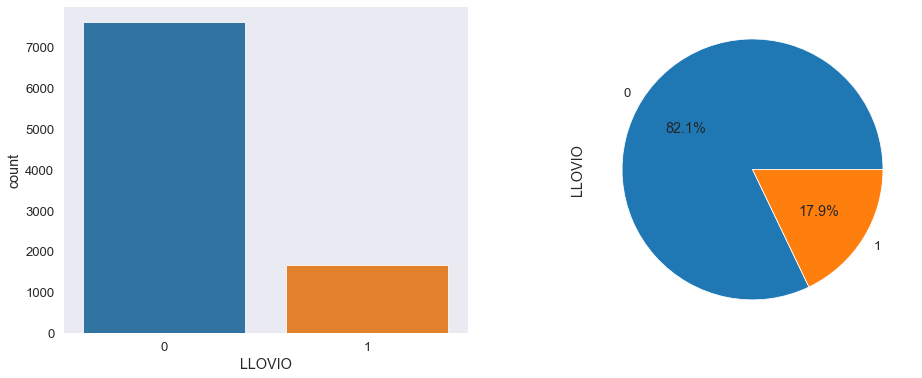

In [51]:
f, ax = plt.subplots(1, 2, figsize=[16, 6])
sns.countplot('LLOVIO', data=df, ax=ax[0])
df['LLOVIO'].value_counts().plot(kind='pie', ax=ax[1], autopct='%1.1f%%', grid=True)
plt.show()


>Esta primer grafica nos permite entender que del total de días, menos del 20% suele llover

### Evolución del promedio de precipitaciones por Año y dia

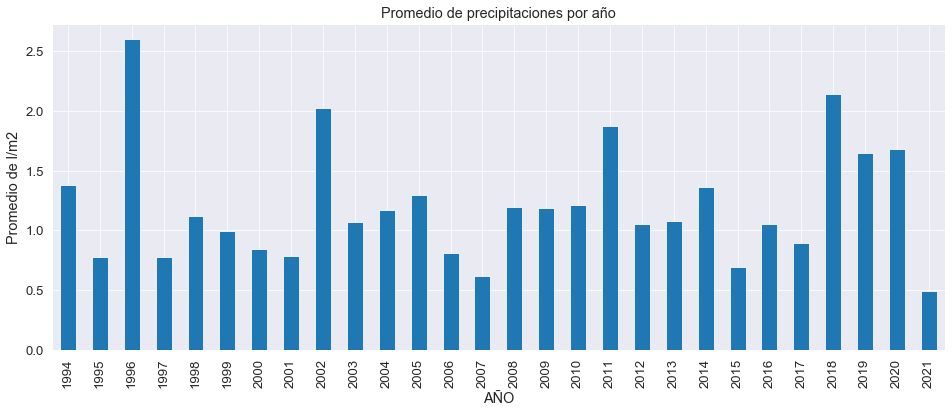

In [52]:
plt.figure(figsize=(16,6))
plt.title('Promedio de precipitaciones por año')
plt.ylabel('Promedio de l/m2')
df.groupby('AÑO')['PRECIPITACION'].mean().plot(kind='bar', grid=True)


Text(0, 0.5, 'Cantidad de precipitaciones')

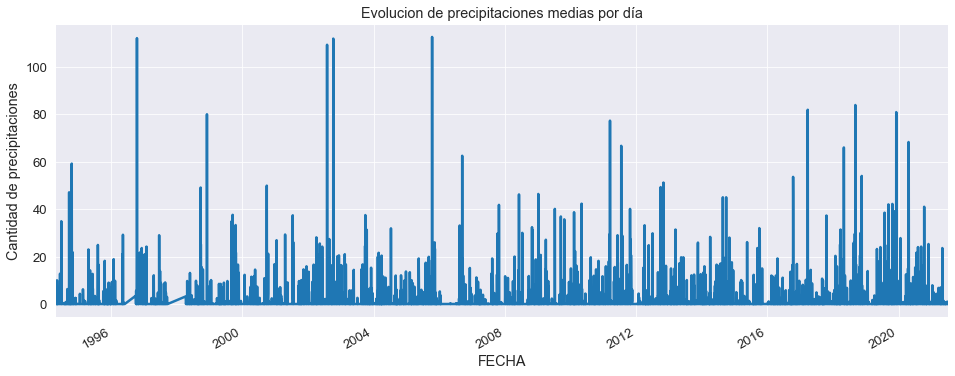

In [53]:
df.groupby('FECHA').sum()['PRECIPITACION'].plot(title='Evolucion de precipitaciones medias por día', grid=True, figsize=(16,6))
plt.ylabel('Cantidad de precipitaciones')


>Si bien la evolución de las precipitaciones pareciera sugerir una leve tendencia decreciente en el tiempo, pareciera que no haber un patrón marcado en cuanto a si en los últimos años está lloviendo más o menos que antes.

#### Promedio de precipitaciones por día del año

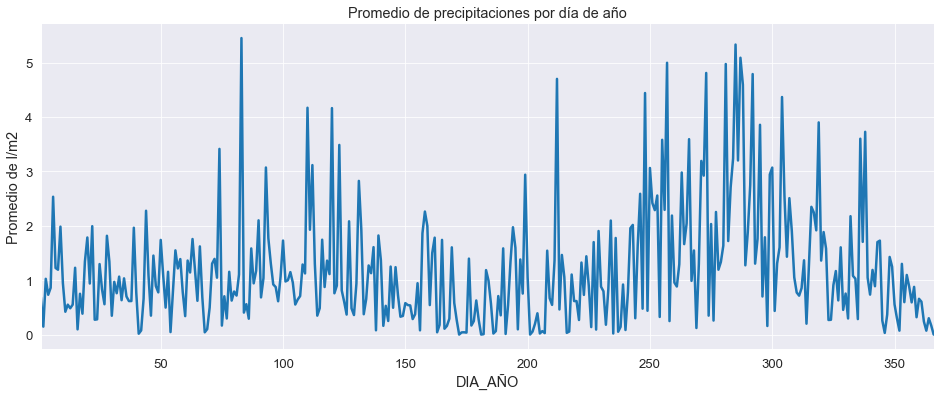

In [54]:
plt.figure(figsize=(16,6))
plt.title('Promedio de precipitaciones por día de año')
plt.ylabel('Promedio de l/m2')
df.groupby('DIA_AÑO')['PRECIPITACION'].mean().plot(grid=True)

> Al desagregar la serie temporal por día del año, comenzamos a ver el primer componente temporal. Existen dos picos de lluvia registrados durante las estaciones de primavera y otoño. Desde aquellos picos la temperatura comienza a decrecer hasta llegar a los valles de precipitaciones en verano e invierno. 

### Desagregación de las series de acuerdo a efectos tendenciales, estacionales y residuales

In [58]:
from statsmodels.tsa.seasonal import seasonal_decompose

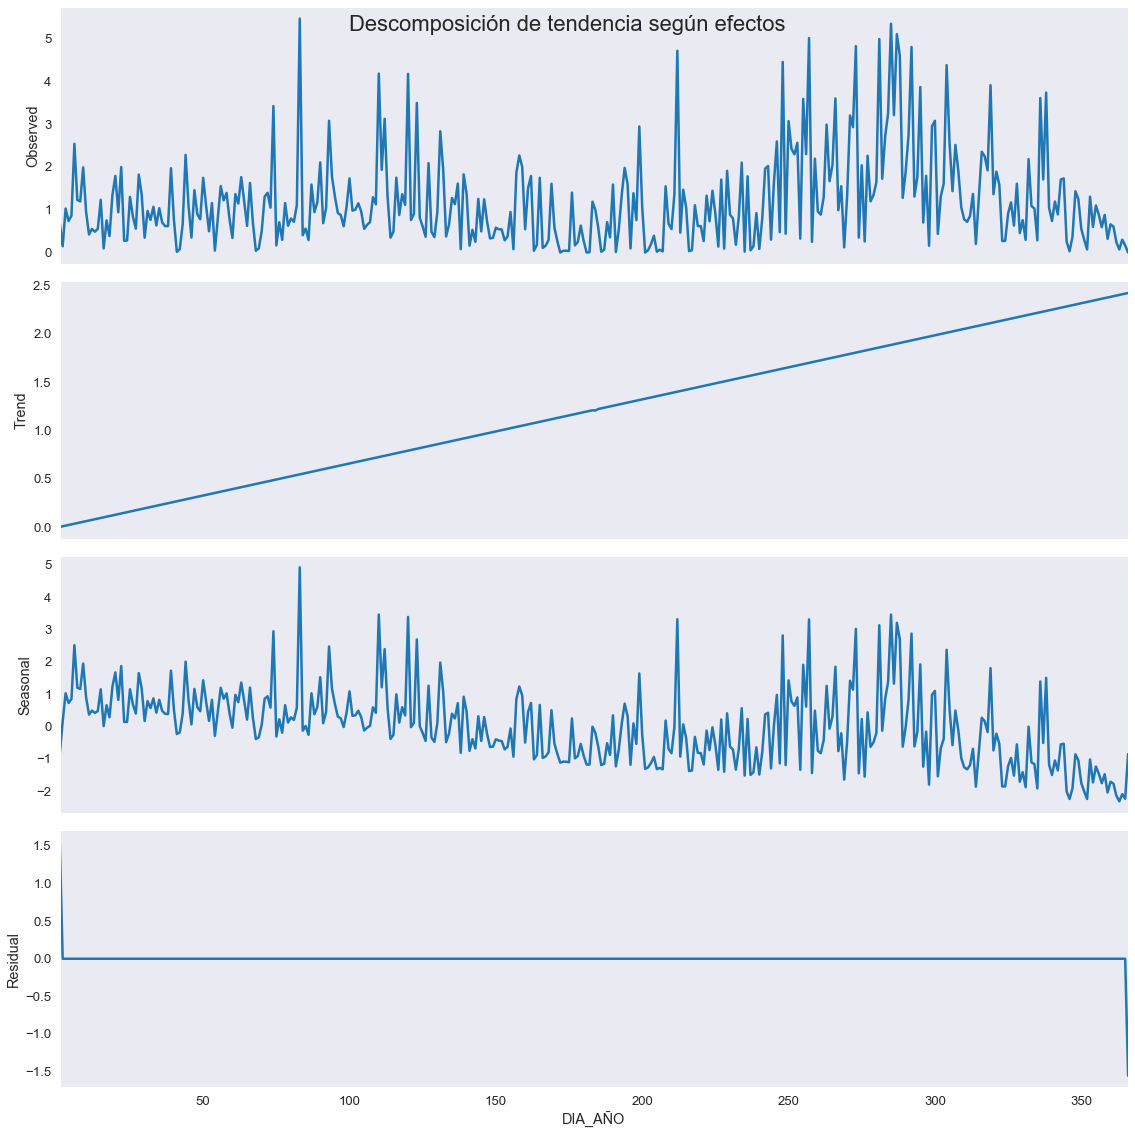

In [103]:
result_add = seasonal_decompose(df.groupby('DIA_AÑO').mean()['PRECIPITACION'], model='additive', extrapolate_trend='freq', freq=365)

# plot
plt.rcParams.update({'figure.figsize': (16,16)})
result_add.plot().suptitle('Descomposición de tendencia según efectos', fontsize = 22)
plt.show()

> El componente estacional permite reconocer una caida tendencial de la lluvia desde inicio de año hasta el final.  Llegando al final si vien el volumen es más bajo, la dispersión es más elevada

## <h1><center>Temperatura</center></h1>

### Evolución de la temperatura por año (máxima, media y mínma)

Text(0, 0.5, 'Grados centigrados °C')

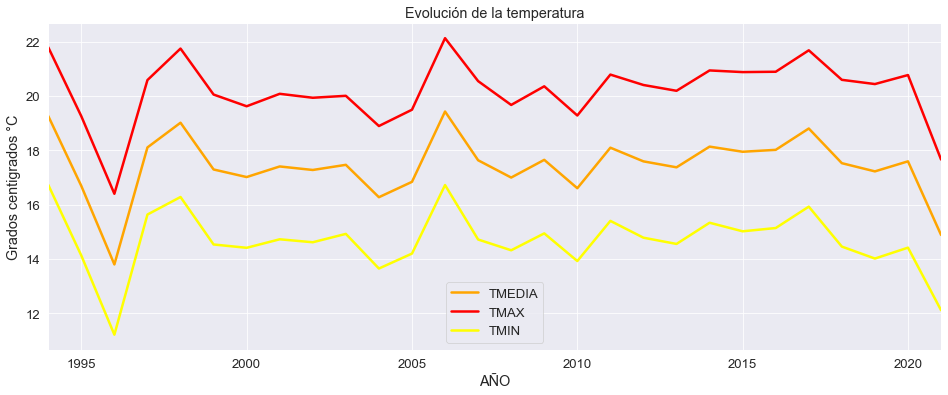

In [55]:
g = df.groupby('AÑO').mean()[['TMEDIA', 'TMAX', 'TMIN']].plot(grid=True, figsize=(16,6), title='Evolución de la temperatura', color=['orange', 'red', 'yellow'])
g.set_ylabel('Grados centigrados °C')

> En el caso de la temperatura, y apoyado por la realidad del calentamiento global, durante los últimos 25 años pareciera pareciera haber una leve tendencia crecimiento. Cabe destacar que el último año representado se encuentra sesgado por haber registrado únicamente la primera mitad del año, que como se verá más adelante, tiene mayor carga de temperatura. 

Text(0, 0.5, 'Grados centigrados °C')

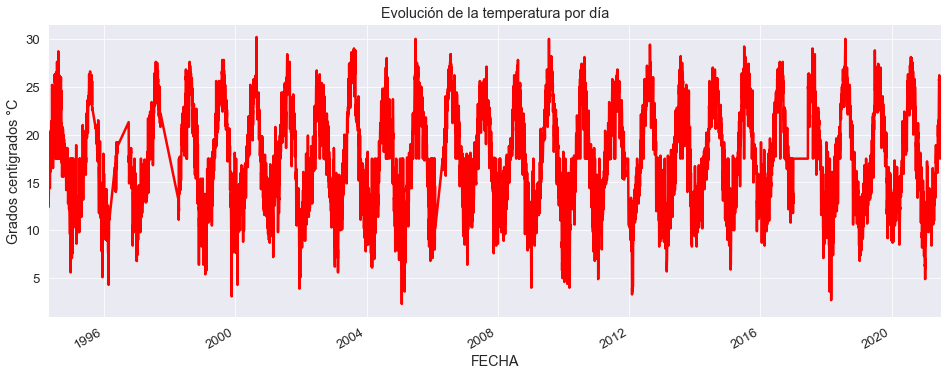

In [56]:
g = df.groupby('FECHA').mean()['TMEDIA'].plot(color='red', grid=True, figsize=(16,6), title='Evolución de la temperatura por día')
g.set_ylabel('Grados centigrados °C')


### Temperatura media, max y min por día del año (promedio 1994 a 2021)

Text(0, 0.5, 'Grados centigrados °C')

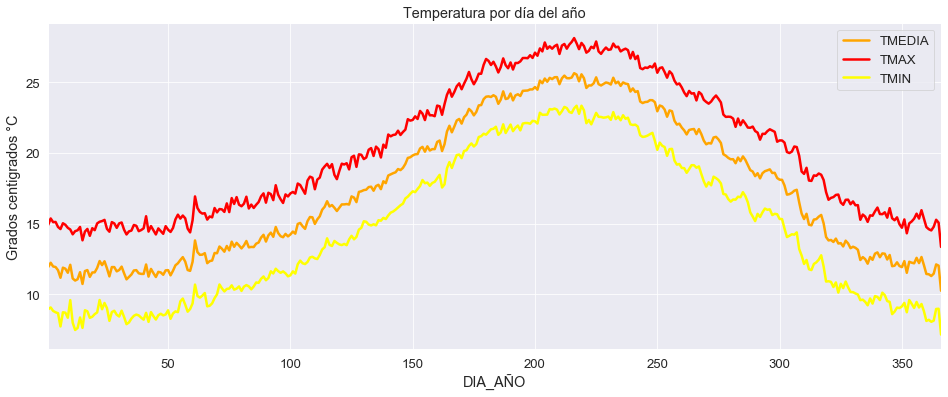

In [57]:
g = df.groupby('DIA_AÑO').mean()[['TMEDIA', 'TMAX', 'TMIN']].plot(color=['orange', 'red', 'yellow'], grid=True, figsize=(16,6), title='Temperatura por día del año')
g.set_ylabel('Grados centigrados °C')

> Mediante este gráfico es evidente la distribución estacional de los registros. Durante le verano se alcanza el pico de temperatura, durante la primavera y el otoño se viven los procesos de ascenso y de descenso, y durante le invierno se alcanza el mínimo

### Desagregación de las series de acuerdo a efectos tendenciales, estacionales y residuales

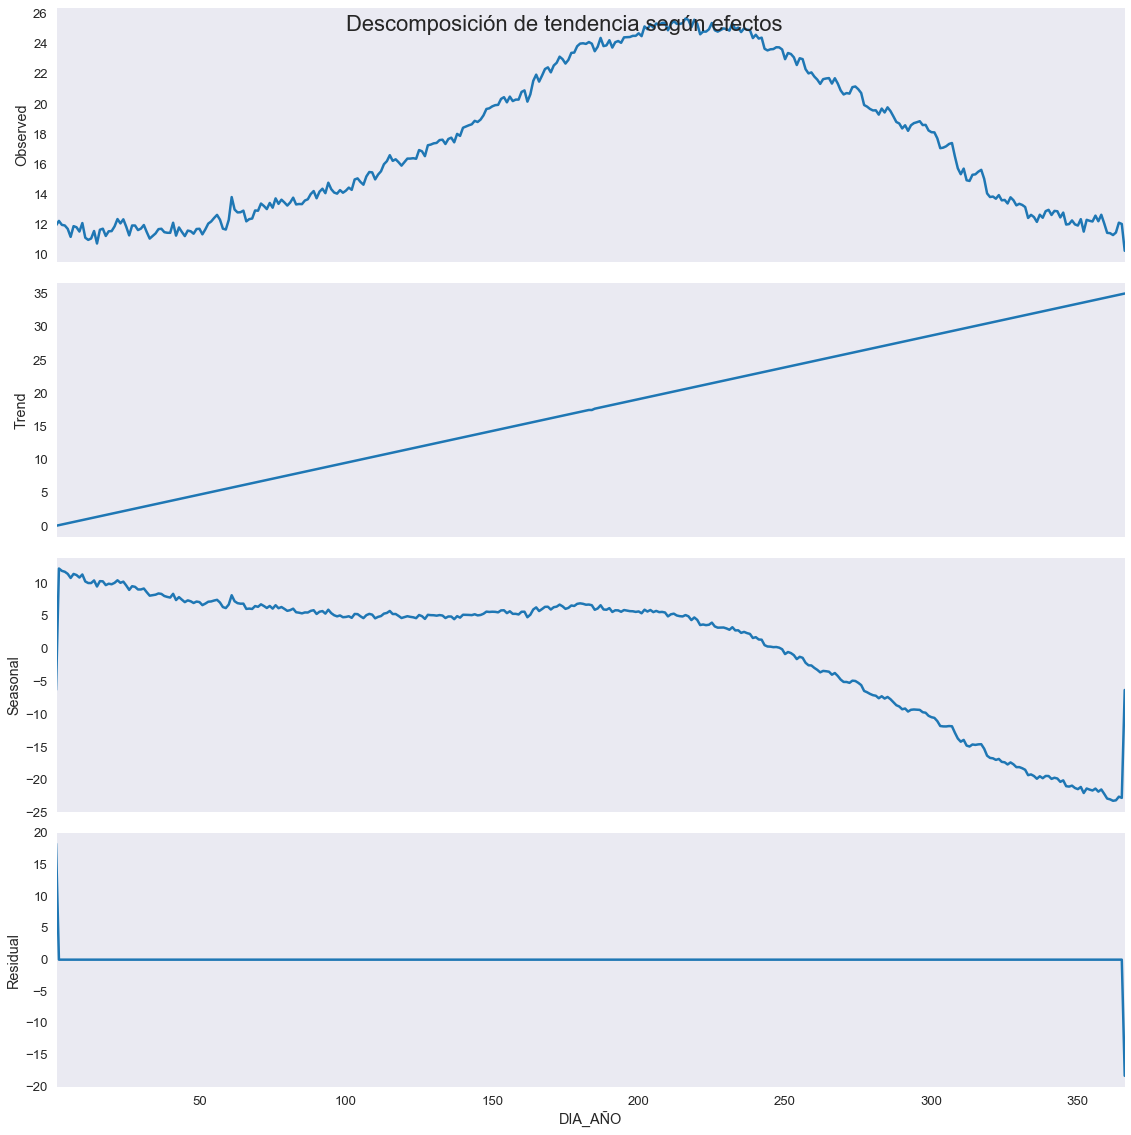

In [104]:
result_add = seasonal_decompose(df.groupby('DIA_AÑO')['TMEDIA'].mean(), model='additive', extrapolate_trend='freq', freq=365)

# plot
plt.rcParams.update({'figure.figsize': (16,16)})
result_add.plot().suptitle('Descomposición de tendencia según efectos', fontsize = 22)
plt.show()

> Mediante la desagregación del resto de efectos que inciden en el nivel de temperatura, se hace más visible la tendencia creciente de la temperatura en el tiempo.

### Gráfico de relación de pares de observaciones entre variables más importantes

In [60]:
variables_2 = ['AÑO', 'DIA_AÑO', 'TMEDIA', 'DIR', 'VELMEDIA', 'RACHA', 'PRESMAX', 'PRECIPITACION']

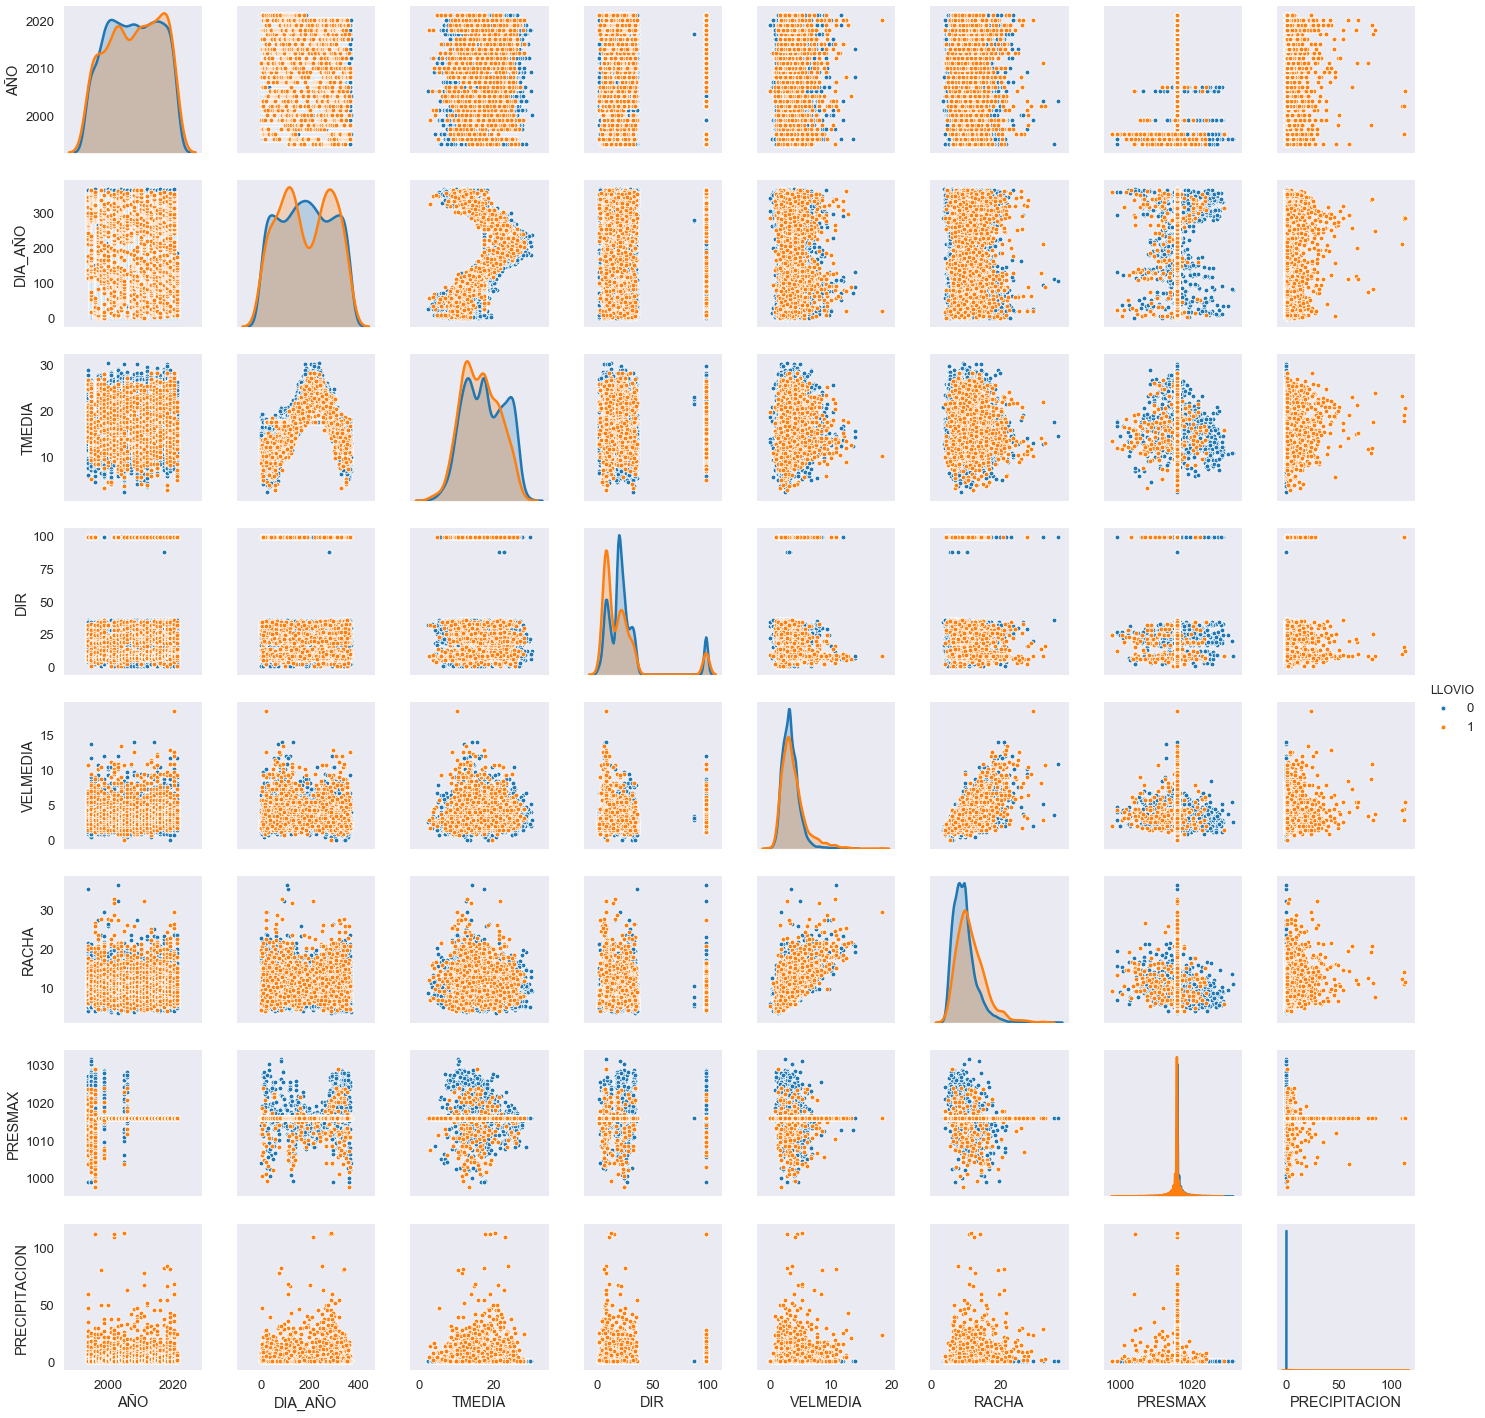

In [61]:
sns.pairplot( data=df, vars=variables_2, hue='LLOVIO' )

> La representación de observaciones entre pares de variables es de gran ayuda para identificar a gran escala la relación que existe entre cada una de ellas. Entre las relaciones más destacadas se encuentran:
    - En términos de tendencia: 
        - Leve incremento sostenido en el tiempo de precipitaciones, temperatura y velocidad del viento. En variable presión en principio no es apreciable.
    - En términos estacionales:
        - El viento (en velocidad y rachas), la presión y en leve medida, las precipitaciones, tienen mayor presencia durante el invierno. Durante la primavera comienzan a descender y durante le otoño empiezan a crecer. 
        - La temperatura demuestra un efecto estacional opuesto. Picos durante verano y valles en invierno. 
    - Relación de resto de variables con PRECIPITACIONES:
        - presión: a mayor nivel de precipitaciones, menor amplitud de presión.
        - viento: relación inversa. A mayor velocidad de viento, menor volumen de precipitaciones.
        - En los días de mayor presión llovió menos. Pareciera haber una relación inversa entre presión y lluvia.
        - En los días de mayor temperatura, no llovió. Fortalece la premisa de relación inversa entre temperatura y lluvia.

# Correlación entre variables

In [62]:
correlacion = df.corr()

In [63]:
correlacion

,AÑO,MES,DIA_MES,DIA_AÑO,PRECIPITACION,TMIN,TMEDIA,TMAX,DIR,VELMEDIA,RACHA,PRESMAX,PRESMIN,LLOVIO
AÑO,1.000000,-0.055983,-0.005762,-0.055882,0.011550,-0.013346,0.013341,0.041901,0.020901,-0.013827,-0.044742,0.013452,0.008722,0.015116
MES,-0.055983,1.000000,0.001332,0.996455,0.034076,0.270236,0.281665,0.286121,0.022133,-0.082797,-0.077217,0.027942,0.023804,0.003758
DIA_MES,-0.005762,0.001332,1.000000,0.085154,-0.005262,0.013884,0.013699,0.012956,0.000398,0.000819,-0.003594,-0.006787,-0.009470,-0.022696
DIA_AÑO,-0.055882,0.996455,0.085154,1.000000,0.033618,0.268070,0.279500,0.284001,0.022460,-0.083412,-0.077169,0.027398,0.022822,0.001982
PRECIPITACION,0.011550,0.034076,-0.005262,0.033618,1.000000,-0.024549,-0.039439,-0.054419,-0.048540,0.107322,0.175427,-0.063597,-0.060363,0.477704
TMIN,-0.013346,0.270236,0.013884,0.268070,-0.024549,1.000000,0.987843,0.947555,-0.115073,0.159314,-0.063018,-0.044943,-0.008961,-0.057008
TMEDIA,0.013341,0.281665,0.013699,0.279500,-0.039439,0.987843,1.000000,0.985639,-0.105416,0.134012,-0.066247,-0.038360,-0.005374,-0.090417
TMAX,0.041901,0.286121,0.012956,0.284001,-0.054419,0.947555,0.985639,1.000000,-0.092149,0.102887,-0.068073,-0.030264,-0.001443,-0.124106
DIR,0.020901,0.022133,0.000398,0.022460,-0.048540,-0.115073,-0.105416,-0.092149,1.000000,-0.098311,-0.063515,0.023731,0.018023,-0.061137
VELMEDIA,-0.013827,-0.082797,0.000819,-0.083412,0.107322,0.159314,0.134012,0.102887,-0.098311,1.000000,0.629156,-0.059468,-0.063391,0.116194


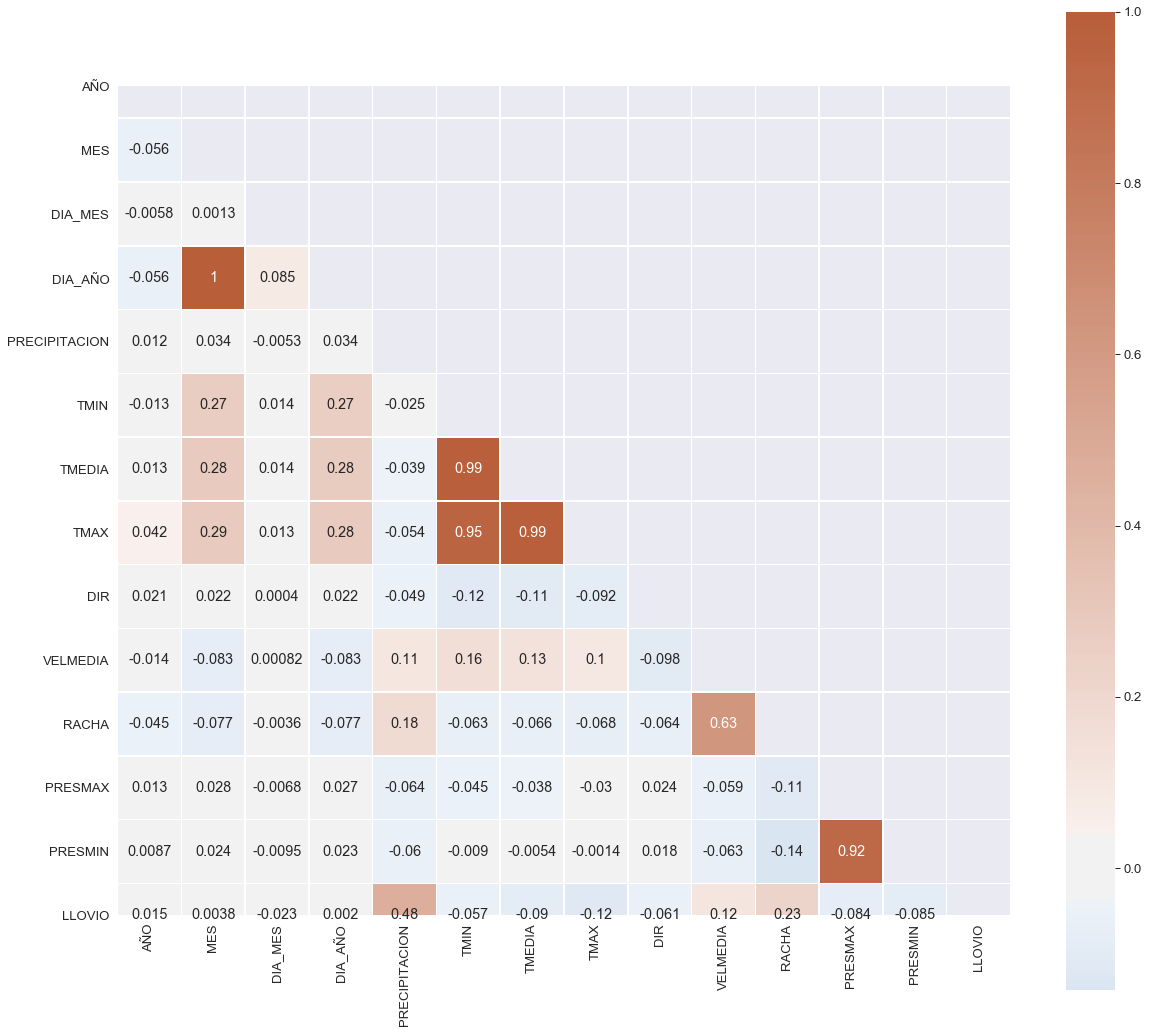

In [64]:
mask = np.triu(np.ones_like(correlacion, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(correlacion, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

> El coeficiente de correlación nos ayuda a cuantificar con mayor grado de precisión y en términos numéricos la dirección y la intensidad de relación entre variables.


>Como complemento a lo descrito hasta el momento, cabe decir que ninguna variable pareciera tener un impacto muy pronunciado en el comportamiento del volumen de precipitaciones. Este escenario, sin embargo, no es obstáculo suficiente para catalogar a las variables como incapaces de pronosticar. Más adelante se analizará si en conjunto las variables tienen influencia o no.

### Correlación entre precipitaciones y resto de variables

In [65]:
df.corr()['PRECIPITACION']

AÑO              0.011550
MES              0.034076
DIA_MES         -0.005262
DIA_AÑO          0.033618
PRECIPITACION    1.000000
TMIN            -0.024549
TMEDIA          -0.039439
TMAX            -0.054419
DIR             -0.048540
VELMEDIA         0.107322
RACHA            0.175427
PRESMAX         -0.063597
PRESMIN         -0.060363
LLOVIO           0.477704
Name: PRECIPITACION, dtype: float64

In [66]:
df.corr()['LLOVIO']

AÑO              0.015116
MES              0.003758
DIA_MES         -0.022696
DIA_AÑO          0.001982
PRECIPITACION    0.477704
TMIN            -0.057008
TMEDIA          -0.090417
TMAX            -0.124106
DIR             -0.061137
VELMEDIA         0.116194
RACHA            0.225196
PRESMAX         -0.083724
PRESMIN         -0.085437
LLOVIO           1.000000
Name: LLOVIO, dtype: float64

> Haciendo foco en la relación de las variables que cuantifican a la caída de lluvia, la temperatura (TMED) y el viento (VELMEDIA y RACHA) son las más importantes.

> Por otra parte, la influencia de las variables independiente sobre la variable categórica (LLOVIO) de las precipitaciones se muestra más potente que la variable continua (PRECIPITACION)

# <h1><center>Implementación de modelos de Machine Learning</center></h1>

> Se adoptarán dos enfoques de inteligencia artificial. Por un lado se intentará predecir el valor de la variable "LLOVIO" con sus dos acepciones, su variante positiva (valor 1) haciendo referencia al caso en que se hubiese registrado caída de lluvia (mayor a 0,1 l/m2) y su variante negativa (valor 0), siendo el caso en que no se hubiese registrado caída de precipitaciones.
Para ello se implementarán múltiples modelos de clasificación tomando como input el conjunto de variables disponibles y luego se procederá a realizar la comparación y la evaluación de los modelos ejecutados.

> Por otra parte, se intentará predecir la variable "PRECIPITACION" que dimensiona el volumen de precipitaciones en aquellos casos en que efectivamente se haya registrado caída de precipitaciones. Nuevamente, se utilizarán las varaibles disponibles de base y se ejecutarán múltiples modelos con el objetivo de identificar el mejor.

> Más tarde (si dispongo de tiempo), intentaré introducir nuevos elementos al modelo mediante el preprocesamiento de las variables disponibles y con la intención de mejorar la calidad y la performance de los modelos elegidos. Dentro de las posibles alternativas a estudiar se encuentran:

   >- Obtener una serie histórica de nuevas variables que se piense afecten la presencia de lluvia como son la humedad, la nubosidad y la presencia de sol. Sería ideal disponer de estas variables desagregadas bajo la misma serie temporal de la cual se disponen el resto de las variables, es decir, expresadas a nivel fecha. --> **En principio esta alternativa queda descartada por falta de tiempo.**
   
   >- Introducir una nueva variable denominada **"RACHA_LLUVIA"** que exprese la cantidad de días consecutivos en los que se ha registrado caída de precipitaciones. Habría que estudiar inicialmente su interacción con las dos variables disponibles de precipitaciones y luego entender cuál sería su mejor implementación para ser considerada como una variable adicional del modelo. En principio, estaría confeccionada como una variable del tipo Dummy.
    
   >- Transformar los valores de algunas variables en rangos con el objetivo de representar de mejor manera la distribución de los valores. Para el caso de la temperatura, por ejemplo, si se observa el gráfico de dispersión previamente creado, entonces puede notarse que puntualmente en aquellos días de mayor temperatura durante el verano no llovió. En esa franja de datos en particular, pareciera haber una relación marcada. Para el resto de niveles de temperatura, entonces la relación es más difusa. 
   **--> Finalmente no se implementó por tiempo!**
   
   >- Otra alternativa sería estudiar la posibilidad de normalizar las variables en vez de estandarizarlas. En algunos casos podrían observarse mejores resultados. 

# Aprendizaje supervisado - Clasifiación de "Llovió" en valores 1 (caso de lluvia) y 0 (caso de no lluvia)

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict

### Preparación de variables para modelo

In [68]:
columnas_modelo_1 = ['AÑO', 'MES', 'DIA_MES', 'DIA_AÑO', 'LLOVIO', 'TMIN', 'TMEDIA', 'TMAX', 'DIR', 'VELMEDIA', 'RACHA', 'PRESMAX', 'PRESMIN']

In [69]:
modelo_clasif = df[columnas_modelo_1]

### Estandarización de variables

> Se procede a estandarizar las variables numéricas, con excepción de la variable objetivo, con la intención de que haya una ponderación balanceada por parte del modelo respecto a la multiplicidad de escalas según cada variable.

In [70]:
scaler = StandardScaler()

In [71]:
columnas_std = ['TMIN', 'TMEDIA', 'TMAX', 'DIR', 'VELMEDIA', 'RACHA', 'PRESMAX', 'PRESMIN']

In [72]:
modelo_clasif[columnas_std] = scaler.fit_transform(modelo_clasif[columnas_std])

C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tomi_\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Separación entre Train y Test sets

> Separación entre Train y Test sets mediante sampleo aleatorio y particionando la muestra en tamaños de 0,8 y 0,2% respectivamente. Este paso es fundamental para poder entrenar el modelo con el primer dataset y para probar y validar los resultados obtenidos mediante la utilizaicón del segundo

In [73]:
train, test = train_test_split(modelo_clasif, test_size = 0.2, random_state=42)

In [74]:
X_train = train.drop(columns = ['LLOVIO'], axis=1).values
y_train = train['LLOVIO'].values

In [75]:
X_test = test.drop(columns = ['LLOVIO'], axis=1).values
y_test = test['LLOVIO'].values

In [76]:
X_train

array([[ 1.99800000e+03,  1.20000000e+01,  2.70000000e+01, ...,
        -7.76091382e-03,  0.00000000e+00,  1.07815171e-13],
       [ 2.01000000e+03,  9.00000000e+00,  2.30000000e+01, ...,
        -2.42126763e-01,  0.00000000e+00,  1.07815171e-13],
       [ 1.99400000e+03,  7.00000000e+00,  1.50000000e+01, ...,
         5.78153710e-01,  1.48417594e+00,  1.86283482e+00],
       ...,
       [ 2.01000000e+03,  9.00000000e+00,  9.00000000e+00, ...,
        -3.30013957e-01,  0.00000000e+00,  1.07815171e-13],
       [ 1.99700000e+03,  5.00000000e+00,  4.00000000e+00, ...,
         4.90266516e-01,  0.00000000e+00,  1.07815171e-13],
       [ 2.01600000e+03,  1.00000000e+00,  7.00000000e+00, ...,
         1.63280003e+00,  0.00000000e+00,  1.07815171e-13]])

In [77]:
y_train

array([0, 1, 0, ..., 0, 0, 0])

In [78]:
X_test

array([[ 1.99700000e+03,  1.00000000e+00,  2.80000000e+01, ...,
         1.63280003e+00,  0.00000000e+00,  1.07815171e-13],
       [ 2.00000000e+03,  1.00000000e+00,  1.00000000e+00, ...,
        -8.86632850e-01,  0.00000000e+00,  1.07815171e-13],
       [ 2.01300000e+03,  6.00000000e+00,  1.40000000e+01, ...,
        -1.54239570e-01,  0.00000000e+00,  1.07815171e-13],
       ...,
       [ 2.01800000e+03,  8.00000000e+00,  2.00000000e+01, ...,
        -6.52267000e-01,  0.00000000e+00,  1.07815171e-13],
       [ 2.01200000e+03,  1.20000000e+01,  1.30000000e+01, ...,
        -1.54239570e-01,  0.00000000e+00,  1.07815171e-13],
       [ 1.99700000e+03,  9.00000000e+00,  3.00000000e+00, ...,
        -9.56481074e-02,  0.00000000e+00,  1.07815171e-13]])

In [79]:
y_test

array([1, 0, 0, ..., 0, 0, 0])

## Definición e implementación de modelos

> Se procede a generar un array que contenga la definición de cada uno de los modelos a ejecutar para entrenar el TRAIN set. 


In [80]:
models = []

def classification_Models(X_train, X_test, y_train, y_test ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('DTC', DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier(n_neighbors=5)) )
    models.append( ('SVM',  SVC()) )
    models.append( ('XGBC', XGBClassifier()))
    models.append( ('RFC', RandomForestClassifier(n_estimators = 10, random_state=32)))

        
classification_Models(X_train, X_test, y_train, y_test)

> Se comparan los resultados obtenidos mediante la ejecución de una "cross validation" con 5 folds. Se replica la ejecución del modelo 5 veces en cada caso habiendo particionado el Train set en misma cantidad de fragmentos. Luego se obtiene la media del coeficiente de "accuracy" y se imprimen los resultados para su comparación

In [81]:
modeloutcomes = []
modelnames = []
for name,model in models:
        v_results = cross_val_score(model, X_train, y_train, cv = 5, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)


LR 0.8234267793301623
DTC 0.7532023308184582
KNN 0.801455671009991
SVM 0.818034762347031
XGBC 0.8250430303548028
RFC 0.8232906452826555


> Representación gráfica mediante utilización de Box plots

[array([0.82008086, 0.82075472, 0.8254717 , 0.82412399, 0.82670263]), array([0.74797844, 0.75202156, 0.73652291, 0.76819407, 0.76129467]), array([0.80121294, 0.80592992, 0.79784367, 0.80121294, 0.80107889]), array([0.8180593 , 0.8180593 , 0.8180593 , 0.8180593 , 0.81793661]), array([0.82479784, 0.82681941, 0.83423181, 0.82008086, 0.81928523]), array([0.82749326, 0.82075472, 0.82277628, 0.82884097, 0.816588  ])]


{'whiskers': [<matplotlib.lines.Line2D at 0x2db2f78c908>,
 'caps': [<matplotlib.lines.Line2D at 0x2db2f787648>,
 'boxes': [<matplotlib.lines.Line2D at 0x2db2f787448>,
 'medians': [<matplotlib.lines.Line2D at 0x2db2f786a88>,
 'fliers': [<matplotlib.lines.Line2D at 0x2db2f793588>,
 'means': []}

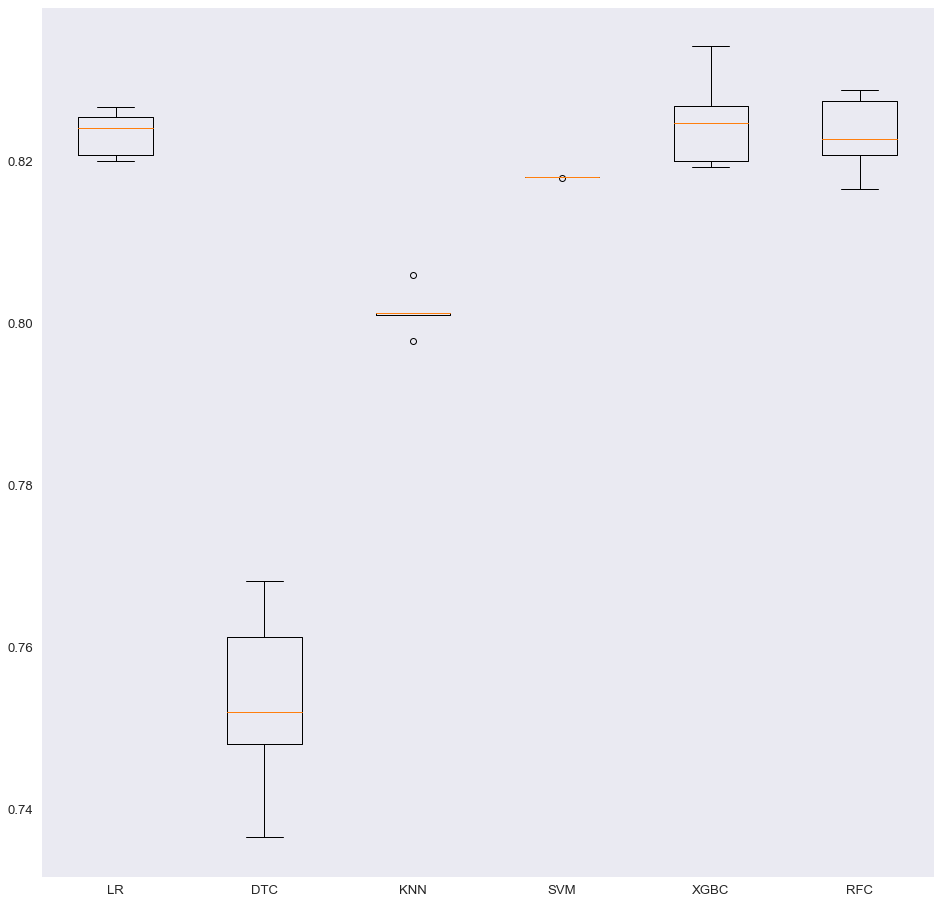

In [82]:
print(modeloutcomes)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xticklabels(modelnames)
plt.boxplot(modeloutcomes)

### Análisis mejor modelo y refinamiento de atributos

In [83]:
# Create Decision Tree classifer object
rfc = RandomForestClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
rfc = rfc.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rfc = rfc.predict(X_test)

##### Evaluación del modelo

In [84]:
print('Evaluación calidad Modelo')
print('---------------------------')
print('---------------------------')
print('Confusion Matrix')
print('---------------------------')
print('---------------------------')
print(confusion_matrix(y_test, y_pred_rfc))
print('---------------------------')
print('---------------------------')
print('Classif Report')
print('---------------------------')
print('---------------------------')
print(classification_report(y_test, y_pred_rfc))

Evaluación calidad Modelo
---------------------------
---------------------------
Confusion Matrix
---------------------------
---------------------------
[[1547    0]
 [ 307    1]]
---------------------------
---------------------------
Classif Report
---------------------------
---------------------------
              precision    recall  f1-score   support

           0       0.83      1.00      0.91      1547
           1       1.00      0.00      0.01       308

    accuracy                           0.83      1855
   macro avg       0.92      0.50      0.46      1855
weighted avg       0.86      0.83      0.76      1855



##### Atributos más importantes

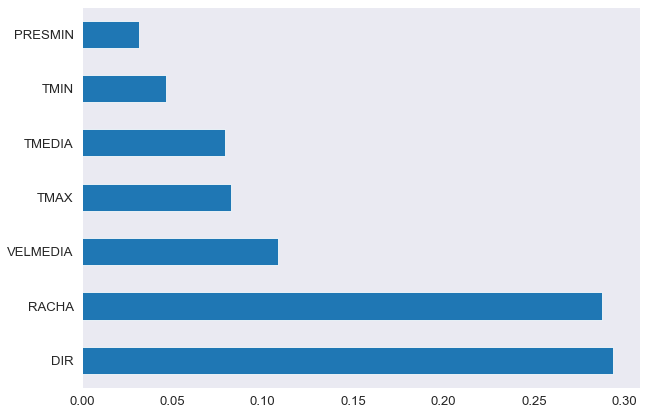

In [85]:
# plot the 7 most important features 
plt.figure(figsize=(10,7))
feat_importances = pd.Series(rfc.feature_importances_, index = train.drop(columns='LLOVIO', axis=1).columns)
feat_importances.nlargest(7).plot(kind='barh');

> Segun el modelo, la dirección y la racha son las variables más importantes a la hora de pronosticar.

### Análisis de calidad del modelo seleccionado

> Hay que destacar que existen múltiples herramientas para analizar la calidad de un modelo. Mediante el reporte de clasificación previamente impreso, podemos dar cuenta de las principales: accuracy, precision (precision), recall (exhaustividad). 

> La precisión hace referencia al ratio entre la cantidad de observaciones que han sido correctamente predecidas como positivas sobre el total de predicciones positivas:  
            - formula: verdaderos positivos / (verdaderos positivos + falsos positivos)
            

> El recall hace referencia al ratio entre verdaderos positivos y el conjunto de observaciones efectivamente positivas. Lo que busca representar este coeficiente es, de todos aquellos días en que efectivamente llovió, cuántos fueron catalogados correctamente. 
            - fórmula: verdaderos positivos / (verdaderos positivos + falsos negativos)

> Ambas métricas deben compararse respecto a los posibles valores asociados a la variable objetivo. En este ejemplo, 1 sería el caso favorable de lluvia y 0 el caso de no lluvia. Para nuestro modelo, en principio ambos indicadores serían bastante buenos, lo que indica que el modelo tiene una gran capacidad de predicción <--- Dudo mucho de este enunciado ya que a veces los resultados pueden ser engañosos. Creo que me falta mayor capacidad de analizar correctamente los resultados. Reconocer aquellos casos de overfitting particularmente. 

> **Me quedó pendiente hacer un refinamiento/tunning de cada modelo probando cada uno de los atributos propios de cada función, a modo de mejorar la calidad del mismo**

# Aprendizaje supervisado - Predicción del volumen de precipitaciones

> Al igual que con el aprendizaje supervisado, definimos las variables a incluir en el modelo. Atención que para este enfoque se reemplaza la variable "LLOVIO" por "PRECIPITACION"

In [86]:
columnas_modelo_2 = ['AÑO', 'MES', 'DIA_MES', 'DIA_AÑO', 'PRECIPITACION', 'TMIN', 'TMEDIA', 'TMAX', 'DIR', 'VELMEDIA', 'RACHA', 'PRESMAX', 'PRESMIN']

In [87]:
modelo_reg = df[columnas_modelo_2]

### Estandarización de variables

> Se procede a estandarizar las variables numéricas, con excepción de la variable objetivo, con la intención de que haya una ponderación balanceada por parte del modelo respecto a la multiplicidad de escalas según cada variable.

In [88]:
scaler = StandardScaler()

In [89]:
columnas_std = ['TMIN', 'TMEDIA', 'TMAX', 'DIR', 'VELMEDIA', 'RACHA', 'PRESMAX', 'PRESMIN']

In [90]:
modelo_reg[columnas_std] = scaler.fit_transform(modelo_reg[columnas_std])

C:\Users\tomi_\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\tomi_\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Separación entre Train y Test sets

> Separación entre Train y Test sets mediante sampleo aleatorio y particionando la muestra en tamaños de 0,8 y 0,2% respectivamente. Este paso es fundamental para poder entrenar el modelo con el primer dataset y para probar y validar los resultados obtenidos mediante la utilizaicón del segundo

In [91]:
train2, test2 = train_test_split(modelo_reg, test_size = 0.2, random_state=42)

In [92]:
X_train2 = train2.drop(columns = ['PRECIPITACION'], axis=1).values
y_train2 = train2['PRECIPITACION'].values

In [93]:
X_test2 = test2.drop(columns = ['PRECIPITACION'], axis=1).values
y_test2 = test2['PRECIPITACION'].values

In [94]:
X_train2

array([[ 1.99800000e+03,  1.20000000e+01,  2.70000000e+01, ...,
        -7.76091382e-03,  0.00000000e+00,  1.07815171e-13],
       [ 2.01000000e+03,  9.00000000e+00,  2.30000000e+01, ...,
        -2.42126763e-01,  0.00000000e+00,  1.07815171e-13],
       [ 1.99400000e+03,  7.00000000e+00,  1.50000000e+01, ...,
         5.78153710e-01,  1.48417594e+00,  1.86283482e+00],
       ...,
       [ 2.01000000e+03,  9.00000000e+00,  9.00000000e+00, ...,
        -3.30013957e-01,  0.00000000e+00,  1.07815171e-13],
       [ 1.99700000e+03,  5.00000000e+00,  4.00000000e+00, ...,
         4.90266516e-01,  0.00000000e+00,  1.07815171e-13],
       [ 2.01600000e+03,  1.00000000e+00,  7.00000000e+00, ...,
         1.63280003e+00,  0.00000000e+00,  1.07815171e-13]])

In [95]:
y_train2

array([0. , 3.6, 0. , ..., 0. , 0.1, 0. ])

In [96]:
X_test2

array([[ 1.99700000e+03,  1.00000000e+00,  2.80000000e+01, ...,
         1.63280003e+00,  0.00000000e+00,  1.07815171e-13],
       [ 2.00000000e+03,  1.00000000e+00,  1.00000000e+00, ...,
        -8.86632850e-01,  0.00000000e+00,  1.07815171e-13],
       [ 2.01300000e+03,  6.00000000e+00,  1.40000000e+01, ...,
        -1.54239570e-01,  0.00000000e+00,  1.07815171e-13],
       ...,
       [ 2.01800000e+03,  8.00000000e+00,  2.00000000e+01, ...,
        -6.52267000e-01,  0.00000000e+00,  1.07815171e-13],
       [ 2.01200000e+03,  1.20000000e+01,  1.30000000e+01, ...,
        -1.54239570e-01,  0.00000000e+00,  1.07815171e-13],
       [ 1.99700000e+03,  9.00000000e+00,  3.00000000e+00, ...,
        -9.56481074e-02,  0.00000000e+00,  1.07815171e-13]])

In [97]:
y_test2

array([24.2,  0. ,  0. , ...,  0. ,  0. ,  0. ])

## Definición e implementación de modelos

> Otra vez, defino el set de modelos que busco entrenar para mi set de datos


In [98]:
models = []

def classification_Models(X_train2, X_test2, y_train2, y_test2 ):
    

    
    models.append( ('LR',  LinearRegression()) )
    models.append( ('DTR', DecisionTreeRegressor(random_state=32)) )
    models.append( ('RIDGE', Ridge(alpha=0.01)) )
    models.append( ('LASSO',  Lasso(alpha=0.01)) )
    models.append( ('EN', ElasticNet(alpha = 0.01)))
   

        
classification_Models(X_train2, X_test2, y_train2, y_test2)

> Se comparan los resultados obtenidos mediante la ejecución de una "cross validation" con 5 folds. Se replica la ejecución del modelo 5 veces en cada caso habiendo particionado el Train set en misma cantidad de fragmentos. Luego se obtiene la media del coeficiente de "R2" y se imprimen los resultados para su comparación

In [99]:
modeloutcomes = []
modelnames = []
for name,model in models:
        v_results = cross_val_score(model, X_train2, y_train2, cv = 5, 
                                     scoring='r2', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)


LR 0.05088758247500669
DTR -1.4049629928756504
RIDGE 0.05089943713102154
LASSO 0.05194982448641468
EN 0.051788043303593725


> Antes que nada, merece la pena recordar que R2 es uno de los principales coeficientes de calidad de un modelo. Dicho valor se ubica entre 0 y 1. Aquellos valores cercanos a 1 corresponden con un buen modelo siendo que se explica el grueso de los "errores" entre observaciones y puntos predecidos. Un modelo con R2 cercano a 0, por el contrario, constituye un mal modelo, o al menos uno incapaz de dimensionar el valor de la variable que se quiere predecir

> Puede verse que para cada uno de los modelos elegidos, el R2 nunca supera el 0,06%. Mediante la selección de variables que hemos ingresado como inputs y para cada uno de los modelos seleccionados, ninguno tiene buenos resultados a la hora de pronostica la dimensión de la PRECIPITACION caída. 

>Nota: uno de los modelos incluso expresa valores negativos. Hasta el día de hoy me cuesta entender el por qué de dicho valor, pero lo que sí estoy seguro, es que dada las condiciones y las variables de las cuales se dispone, no es un buen modelo.

> Creo que, más allá de hacer un refinamiento de los atributos de cada modelo, la mejora que se pueda alcanzar no va a ser suficiente como para convertir los modelos en "buenos". Por este motivo creo que es necesario introducir nuevos elementos para ser considerados como nuevas variables o al menos modificar la estructura de los ya existentes

> A modo de representar mejor lo que está sucediendo con los modelos, selecciono uno de ellos y procedo por visualizarlo gráficamente.

### Elastic Net

Evaluación calidad Modelo
    MAE 1.9965
    RMSE 5.581
    R2 0.0278


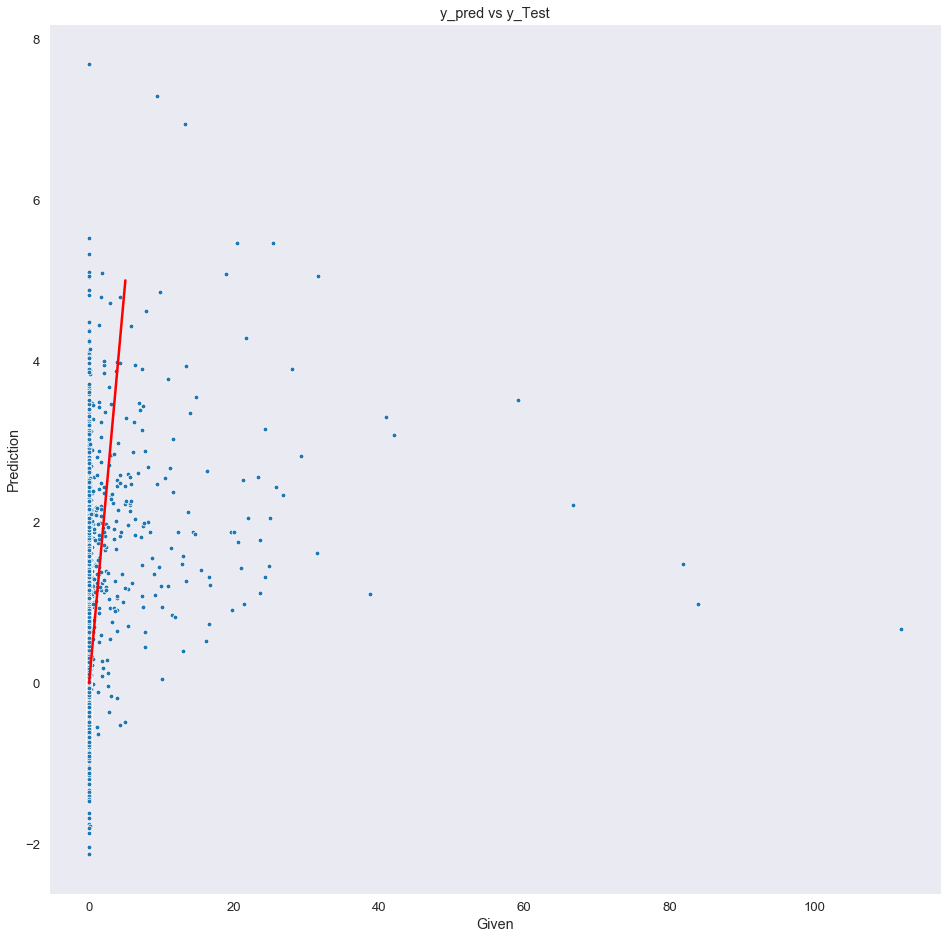

In [100]:
en = ElasticNet(alpha=0.01)
en.fit(X_train2, y_train2)
predictions_en = en.predict(X_test2)

print('Evaluación calidad Modelo')

mae_en = round(mean_absolute_error(y_test2, predictions_en), 4)
rmse_en = round(sqrt(mean_squared_error(y_test2, predictions_en)), 4)
r2_en = round(r2_score(y_test2, predictions_en), 4)

print("    MAE",  mae_en)
print("    RMSE", rmse_en)
print("    R2", r2_en)

 # set viz style
sns.set_style('dark')
# plot the model
plot = sns.scatterplot(y_test2, predictions_en)
plot.set(xlabel='Given', ylabel='Prediction')
plot.set_title('y_pred vs y_Test')
# generate and graph y = x line
x_plot = np.linspace(0,5,100)
y_plot = x_plot
plt.plot(x_plot, y_plot, color='r')

> Un modelo "bueno" sería aquel en que se construyera una línea de tendencia (roja) de 45º (siendo que coincidan las escalas), de manera que los pares de observaciones entre Y observada e Y predecida coincidan. La realidad del model de Elastic Net está muy lejos del escenario ideal planteado. Las predicciones muy pocas veces coinciden con las observaciones del Test set.

### Preprocesamiento

> Como se ha propuesto previamente, una alternativa para intentar mejorar el modelo es incluir una nueva variable que se denomine "RACHA_LLUVIA", la cual exprese para cada fecha qué cantidad de días consecutivos se arrastran con caída registrada de lluvia. Se sospecha que aquellos días en que vengan con seguidilla de lluvia, en principio serían menos propensos a registrar también lluvia.

> Para ello, vamos a volver al dataset inicial y vamos a utilizar la variable "LLOVIO" como referencia. 

> **Dejo pendiente este desarrollo por falta de tiempo.**

### Conclusiones

> En cuanto al intento de predecir si en un día han caído precipitaciones o no, los modelos de clasificación que he adoptado creo que han tenido mejores resultados que los esperados. 

> Respecto al intento de predecir el volumen de precipitaciones (**PRECIPITACION**) por medio de las múltiples regresiones implementadas, creo que estuve lejos de agotar las alternativas posibles pero al menos he abordado la temática. Primero y principal, creo que todavía podría haberse aplicado algún tipo de preprocesamiento para mejorar, al menos marginalmente, el modelo. Este tipo de preprocesamientos, de todas maneras, están sujetos a un estudio previo y a la interacción exhaustiva entre variables, elementos que no he podido completar como hubiese querido dado el tiempo limitado para realizar el trabajo. Una de estas modificaciones hubiese sido por ejemplo el haber incluido el horario de registro de las variables disponibles.

> Más allá del procesamiento, creo que hubiese sido muy beneficioso disponer de una mayor multiplicidad de variables como las expuestas previamente: humedad, presencia de sol y nubosidad. Como premisa del trabajo, he distribuido una fracción del tiempo disponible a recabar en la web este tipo de datos, pero se me ha hecho imposible. No he encontrado por ningún lado series temporales asociadas a Barcelona. Por este motivo, y por la falta de tiempo para seguir buscando, me he visto forzado a abandonar esta via de desarrollo.

> Más allá de la falta de recursos (información disponible) y de la falta de ingenio (en el preprocesamiento de variables), creo que es de común conocimiento que la ciencia de pronóstico del clima es un campo en el cual la ciencia todavía debe dar muchos pasos adelante. Es muy recurrente la falla de aquellos medios de pronósticos masivos del clima (televisión, diarios, etc) no solo en referencia a la capacidad de pronosticar la lluvia, sino también del resto de los factores que inciden en ella. Quizás, parte de las causas que inciden en la incapacidad de nuestra sociedad en efectuar pronósticos efectivos radica en la condición tan dinámica en que se expresa la interacción de todas aquellas variables/efectos que inciden en la lluvia. Es un fenómeno que creo se debe medir a cada hora si es que se pretende tener resultados de pronóstico de calidad. Mientras más cercano en el tiempo el registro de los factores que influyen en las precipitaciones, mejores los resultados. Para el caso de nuestro dataset, si se dispusiese de información por hora, entonces el modelo sería mucho mejor.